In [ ]:
##Necessary Imports

In [63]:
import pandas as pd
from pathlib import Path
import numpy as np
import os
import requests
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [3]:
load_dotenv()

True

In [4]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [ ]:
#ETH APIs

In [49]:
import requests
headers = {'Authorization': 'Bearer ' + access_token}
eth_burn = "https://api.cryptoquant.com/v1/eth/network-data/fees-burnt?window=day"
print(requests.get(url, headers=headers).json())

NameError: name 'access_token' is not defined

In [6]:
eth_burn = requests.get(eth_burn_url).json()

In [7]:
print(json.dumps(eth_burn, indent=4, sort_keys=True))

{
    "result": {},
    "status": {
        "code": 401,
        "description": "401 Unauthorized: Token does not exist.",
        "message": "unauthorized"
    }
}


In [73]:
tickers = ["ETHUSD"]

# Set timeframe
timeframe = "1Day"

# Format current date as ISO format
start_date = pd.Timestamp("2019-04-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-25", tz="America/New_York").isoformat()

In [74]:
df_eth = alpaca.get_crypto_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
ETHUSD = df_eth[df_eth['symbol']=='ETHUSD'].drop('symbol', axis=1)

#df_portfolio = pd.concat([ETHUSD, BTCUSD],axis=1, keys=['ETHUSD','BTCUSD'])


df_eth

,exchange,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,,
2019-04-25 05:00:00+00:00,CBSE,152.07,156.00,148.26,152.41,60721.032559,13521,152.150237,ETHUSD
2019-04-26 05:00:00+00:00,CBSE,152.60,153.97,149.11,153.41,76296.160979,19234,151.729760,ETHUSD
2019-04-27 05:00:00+00:00,CBSE,155.73,156.23,154.04,154.95,9650.043857,3203,155.211903,ETHUSD
2019-04-28 05:00:00+00:00,CBSE,153.17,154.63,153.09,154.61,8430.989089,2080,153.866474,ETHUSD
2019-04-29 05:00:00+00:00,CBSE,152.40,155.79,152.32,154.03,20715.159039,4159,154.425144,ETHUSD
...,...,...,...,...,...,...,...,...,...
2022-04-23 05:00:00+00:00,ERSX,2947.50,2977.60,2922.90,2952.80,342.013445,204,2945.310501,ETHUSD
2022-04-23 05:00:00+00:00,FTXU,2947.30,2978.90,2921.20,2952.00,5242.460000,3496,2943.934503,ETHUSD
2022-04-24 05:00:00+00:00,CBSE,2952.64,2968.31,2841.28,2865.89,80512.158789,455015,2903.325740,ETHUSD


<AxesSubplot:title={'center':'ETH Closing Price vs Volume transacted'}, xlabel='volume'>

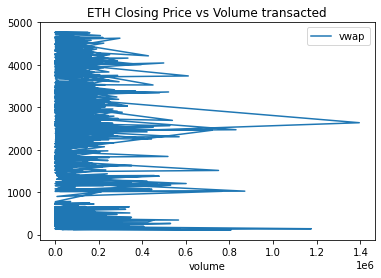

In [95]:
df_eth.plot(y='vwap', x='volume', title='ETH Volume Weighted Avg. Price vs Volume transacted')

In [ ]:
##analyzes ethereum burn rate

In [55]:
eth_burn = eth_burn["result"]

KeyError: 'result'

In [ ]:
##production rate  

In [44]:
value = 6285.00
average_growth_rate = .097
days=365
production_rate = value*(1+average_growth_rate)**days
production_rate

2.9766265203073295e+18

In [ ]:
## difference between the two and historical effects/correlations with price

<AxesSubplot:title={'center':'Daily Growth'}, xlabel='timestamp'>

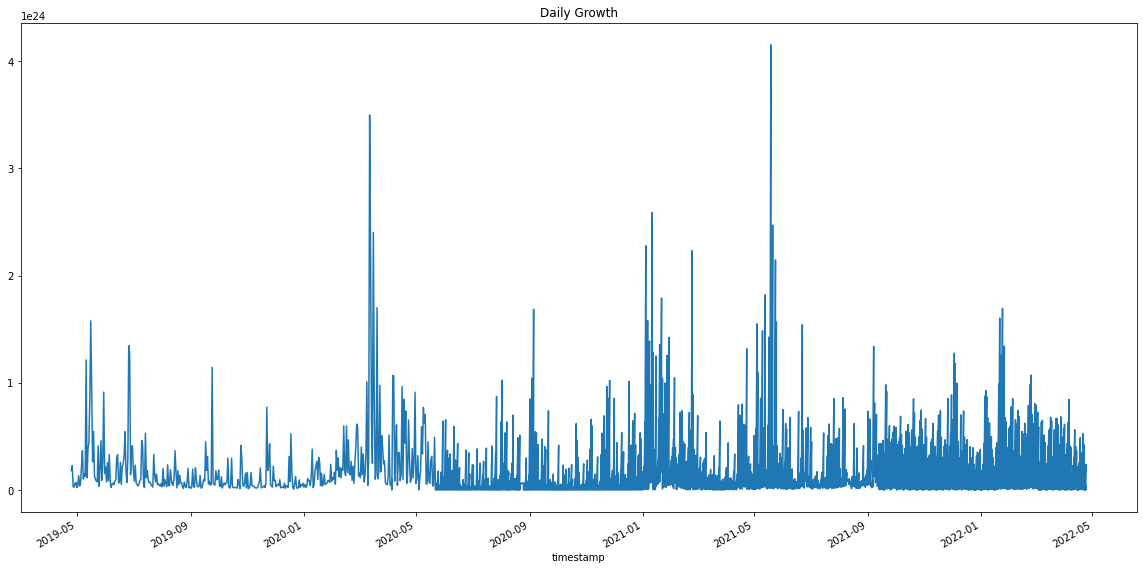

In [94]:
growth = df_eth['volume'] * production_rate
growth.plot(kind='line',figsize=(20,10), title="Daily Growth")

In [ ]:
##General Ethereum analysis

In [77]:
df_eth.describe()


,open,high,low,close,volume,trade_count,vwap
count,2021.000000,2021.000000,2021.000000,2021.000000,2.021000e+03,2.021000e+03,2021.000000
mean,1841.953281,1899.194344,1777.231272,1842.275586,6.328872e+04,7.515361e+04,1840.423919
std,1478.016088,1522.352362,1425.860727,1477.678599,1.069347e+05,1.593603e+05,1475.803349
min,111.950000,120.490000,100.500000,110.300000,2.000000e-03,1.000000e+00,109.751788
25%,287.580000,295.070000,280.000000,288.640000,4.386008e+03,6.720000e+02,285.789511
50%,1852.850000,1900.300000,1791.800000,1862.450000,1.934654e+04,6.780000e+03,1839.679579
75%,3123.500000,3197.580000,3029.100000,3115.300000,8.163050e+04,4.413600e+04,3119.528778
max,4829.290000,4867.790000,4709.200000,4828.790000,1.394960e+06,1.342561e+06,4768.579010


In [ ]:
##std deviation

In [96]:
eth_daily_returns = df_eth['vwap'].pct_change().dropna()
eth_daily_returns

timestamp
2019-04-26 05:00:00+00:00   -0.002764
2019-04-27 05:00:00+00:00    0.022950
2019-04-28 05:00:00+00:00   -0.008668
2019-04-29 05:00:00+00:00    0.003631
2019-04-30 05:00:00+00:00    0.044478
                               ...   
2022-04-23 05:00:00+00:00   -0.003344
2022-04-23 05:00:00+00:00   -0.000467
2022-04-24 05:00:00+00:00   -0.013794
2022-04-24 05:00:00+00:00    0.004008
2022-04-24 05:00:00+00:00   -0.008837
Name: vwap, Length: 2020, dtype: float64

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='timestamp', ylabel='Percent'>

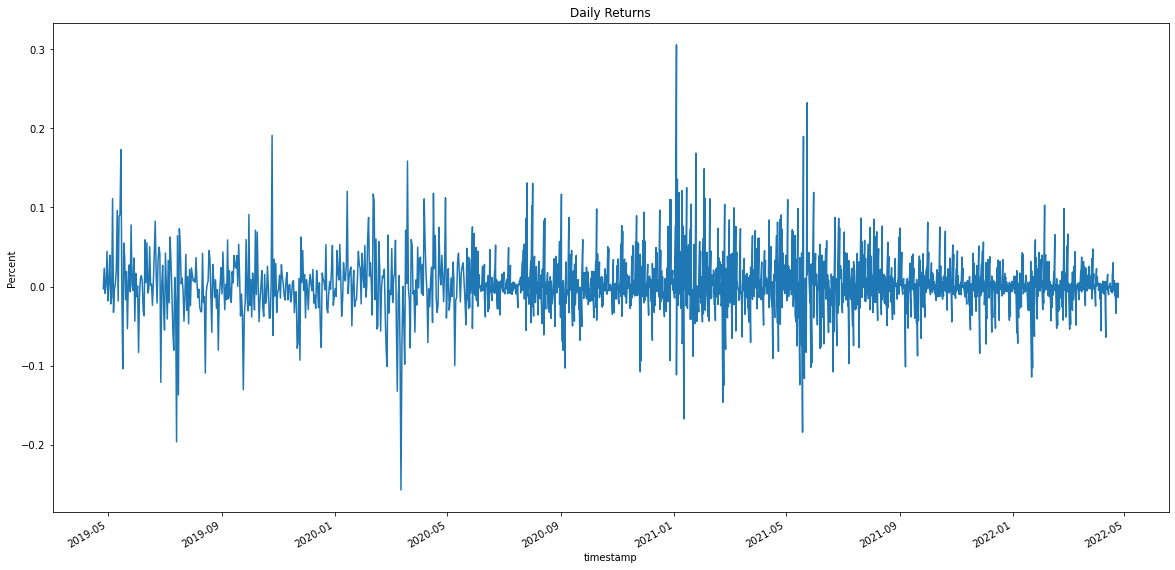

In [97]:
eth_daily_returns.plot(figsize=(20,10), title="Daily Returns", ylabel="Percent")

In [98]:
eth_cumulative_return = (1 + eth_daily_returns).cumprod()
eth_cumulative_return

timestamp
2019-04-26 05:00:00+00:00     0.997236
2019-04-27 05:00:00+00:00     1.020123
2019-04-28 05:00:00+00:00     1.011280
2019-04-29 05:00:00+00:00     1.014952
2019-04-30 05:00:00+00:00     1.060095
                               ...    
2022-04-23 05:00:00+00:00    19.357909
2022-04-23 05:00:00+00:00    19.348866
2022-04-24 05:00:00+00:00    19.081967
2022-04-24 05:00:00+00:00    19.158442
2022-04-24 05:00:00+00:00    18.989137
Name: vwap, Length: 2020, dtype: float64

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='year', ylabel='percent'>

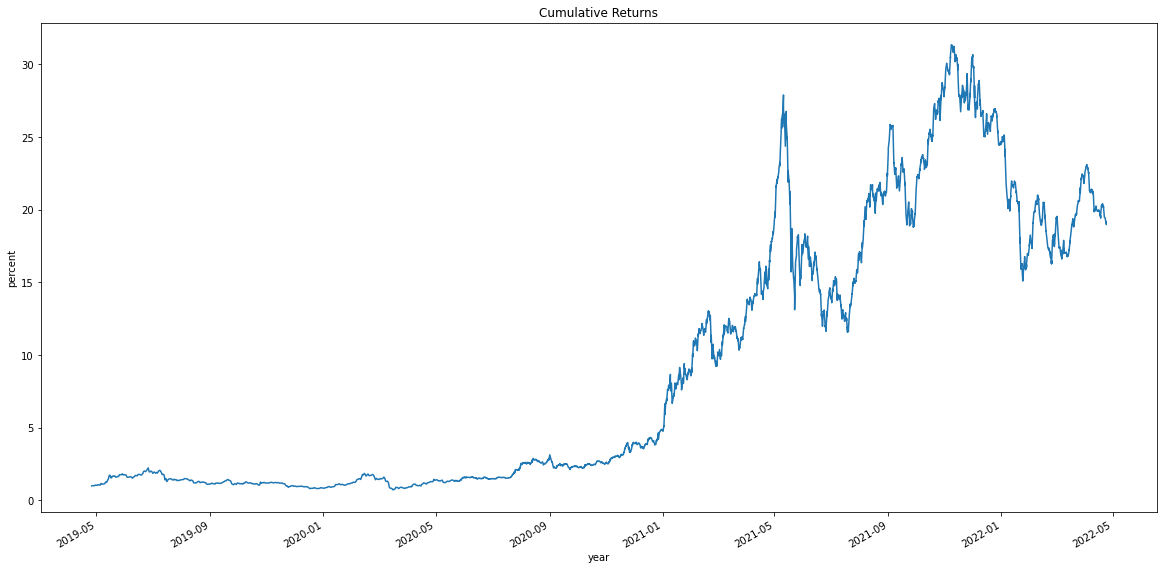

In [99]:
eth_cumulative_return.plot(figsize=(20,10), title="Cumulative Returns", xlabel="year", ylabel="percent")

In [ ]:
##monte carlo of future returns based on mean reversion.

In [90]:
MC_eth = MCSimulation(
    portfolio_data = eth_cumulative_return,
    weights = (.5, .5),
    num_simulation = 500,
    num_trading_days = 365*2
)

# Review the simulation input data
MC_eth.portfolio_data.head()

TypeError: portfolio_data must be a Pandas DataFrame

In [ ]:
MC_eth.calc_cumulative_return()

In [ ]:
eth_line_plot = MC_eth.plot_simulation()

In [ ]:
eth_distribution_plot = MC_eth.plot_distribution()

In [ ]:
MC_eth.summarize_cumulative_return()

In [ ]:
##Parse all of this into functions for modularization.